In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('flights.csv', low_memory=False)

In [ ]:
#Seleciona colunas para PCA
cols_atraso = ['DEPARTURE_DELAY', 'TAXI_OUT', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df[cols_atraso] = df[cols_atraso].fillna(0)

In [ ]:
df_aeroportos = df.groupby('ORIGIN_AIRPORT').agg({
    'DEPARTURE_DELAY': 'mean',
    'TAXI_OUT': 'mean',
    'CANCELLED': 'mean',
    'SECURITY_DELAY': 'mean',
    'LATE_AIRCRAFT_DELAY': 'mean',
    'WEATHER_DELAY': 'mean'
}).reset_index()

In [ ]:
#Prepara os dados

scaler = StandardScaler()
cols_para_cluster = ['DEPARTURE_DELAY', 'TAXI_OUT', 'CANCELLED', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_scaled = scaler.fit_transform(df_aeroportos[cols_para_cluster])

In [ ]:
pca = PCA(n_components=2)
pca_dados = pca.fit_transform(df_scaled)

In [ ]:
#Realiza o KMEANS
kmeans = KMeans(n_clusters=4, random_state=42)
df_aeroportos['Cluster'] = kmeans.fit_predict(pca_dados)

In [ ]:
df_aeroportos['PCA1'] = pca_dados[:, 0]
df_aeroportos['PCA2'] = pca_dados[:, 1]

--- Perfil Médio dos Clusters ---
         DEPARTURE_DELAY   TAXI_OUT  CANCELLED  SECURITY_DELAY  \
Cluster                                                          
0               1.618280  13.126791   0.006078        0.010596   
1               7.938073  14.637434   0.016661        0.011414   
2              13.720486   9.625000   0.036458       10.553819   
3               9.094345  11.417700   0.040869        0.051697   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
Cluster                                      
0                   2.233111       0.147601  
1                   4.544274       0.454361  
2                   0.979167       0.166667  
3                   6.291871       0.791137  

--- Exemplos de Aeroportos ---
Cluster 0: ['10140', '10141', '10146', '10155', '10158']
Cluster 1: ['10135', '10154', '10185', '10372', '10431']
Cluster 2: ['10165', 'ADK']
Cluster 3: ['10136', '10157', '10170', '10333', '10423']


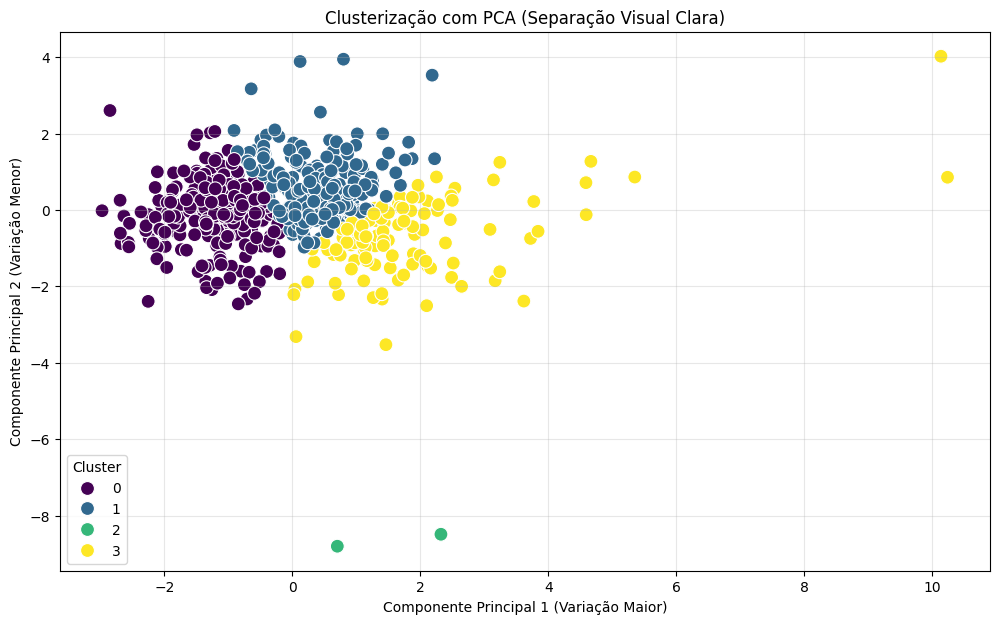

In [ ]:
analise_clusters = df_aeroportos.groupby('Cluster')[cols_para_cluster].mean()

print("--- Perfil Médio dos Clusters ---")
print(analise_clusters)

print("\n--- Exemplos de Aeroportos ---")
for i in range(4):
    aeroportos = df_aeroportos[df_aeroportos['Cluster'] == i]['ORIGIN_AIRPORT'].head(5).tolist()
    print(f"Cluster {i}: {aeroportos}")

# 7. Visualização
# Agora usamos PCA1 e PCA2 nos eixos. A separação será VISUALMENTE PERFEITA.
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_aeroportos, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)

plt.title('Clusterização com PCA (Separação Visual Clara)')
plt.xlabel('Componente Principal 1 (Variação Maior)')
plt.ylabel('Componente Principal 2 (Variação Menor)')
plt.grid(True, alpha=0.3)
plt.show()